## Upfront Pricing Precision Analysis

In [6]:
import pandas as pd

data = pd.read_csv(r'C:\Users\psupa\Desktop\Portfolio Projects\Data Driven & Decision Support\Taxi Upfront Pricing Precision\data\raw_data\test.csv')
data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [7]:
num_rides = len(data)
missing_values = data.isnull().sum()
desc_stats = data.describe()

num_rides, missing_values, desc_stats

(4943,
 order_id_new                0
 order_try_id_new            0
 calc_created                0
 metered_price              20
 upfront_price            1534
 distance                    0
 duration                    0
 gps_confidence              0
 entered_by                  0
 b_state                     0
 dest_change_number          0
 prediction_price_type      20
 predicted_distance         20
 predicted_duration         20
 change_reason_pricing    4645
 ticket_id_new               0
 device_token             4943
 rider_app_version          16
 order_state                 0
 order_try_state             0
 driver_app_version          0
 driver_device_uid_new       0
 device_name                 0
 eu_indicator                0
 overpaid_ride_ticket        0
 fraud_score              2759
 dtype: int64,
        order_id_new  order_try_id_new  metered_price  upfront_price  \
 count   4943.000000       4943.000000    4923.000000    3409.000000   
 mean    2061.074449       2

In [8]:
data['price_difference'] = ((data['metered_price'] - data['upfront_price']) / data['metered_price']) * 100
off_by_20 = data[(data['price_difference'].abs() > 20)]
percentage_off_by_20 = (len(off_by_20) / num_rides) * 100

percentage_off_by_20

27.513655674691485

In [9]:
gps_confidence_dist = off_by_20['gps_confidence'].value_counts(normalize=True) * 100
dest_change_dist = off_by_20['dest_change_number'].value_counts(normalize=True) * 100
entered_by_dist = off_by_20['entered_by'].value_counts(normalize=True) * 100
prediction_type_dist = off_by_20['prediction_price_type'].value_counts(normalize=True) * 100
change_reason_dist = off_by_20['change_reason_pricing'].value_counts(normalize=True) * 100
rider_app_version_dist = off_by_20['rider_app_version'].value_counts(normalize=True) * 100
driver_app_version_dist = off_by_20['driver_app_version'].value_counts(normalize=True) * 100
device_name_dist = off_by_20['device_name'].value_counts(normalize=True) * 100
eu_indicator_dist = off_by_20['eu_indicator'].value_counts(normalize=True) * 100
overpaid_ride_ticket_dist = off_by_20['overpaid_ride_ticket'].value_counts(normalize=True) * 100
fraud_score_dist = off_by_20['fraud_score'].describe()

gps_confidence_dist, dest_change_dist, entered_by_dist, prediction_type_dist, change_reason_dist, rider_app_version_dist, driver_app_version_dist, device_name_dist, eu_indicator_dist, overpaid_ride_ticket_dist, fraud_score_dist

(gps_confidence
 1    80.955882
 0    19.044118
 Name: proportion, dtype: float64,
 dest_change_number
 1    95.000000
 3     2.794118
 2     1.838235
 4     0.220588
 7     0.147059
 Name: proportion, dtype: float64,
 entered_by
 client    97.941176
 driver     2.058824
 Name: proportion, dtype: float64,
 prediction_price_type
 upfront    100.0
 Name: proportion, dtype: float64,
 change_reason_pricing
 client_destination_changed    100.0
 Name: proportion, dtype: float64,
 rider_app_version
 CI.4.17    19.485294
 CI.4.19    11.544118
 CA.5.43     9.411765
 CA.5.42     8.897059
 CA.5.44     7.867647
              ...    
 CI.3.75     0.073529
 CI.3.92     0.073529
 CA.4.44     0.073529
 CI.3.81     0.073529
 CI.4.05     0.073529
 Name: proportion, Length: 73, dtype: float64,
 driver_app_version
 DA.4.39    27.941176
 DA.4.37    24.191176
 DA.4.42    12.500000
 DA.4.34     6.838235
 DA.4.31     6.617647
 DI.3.34     2.941176
 DA.4.35     2.647059
 DA.4.41     2.573529
 DI.3.33     2.352

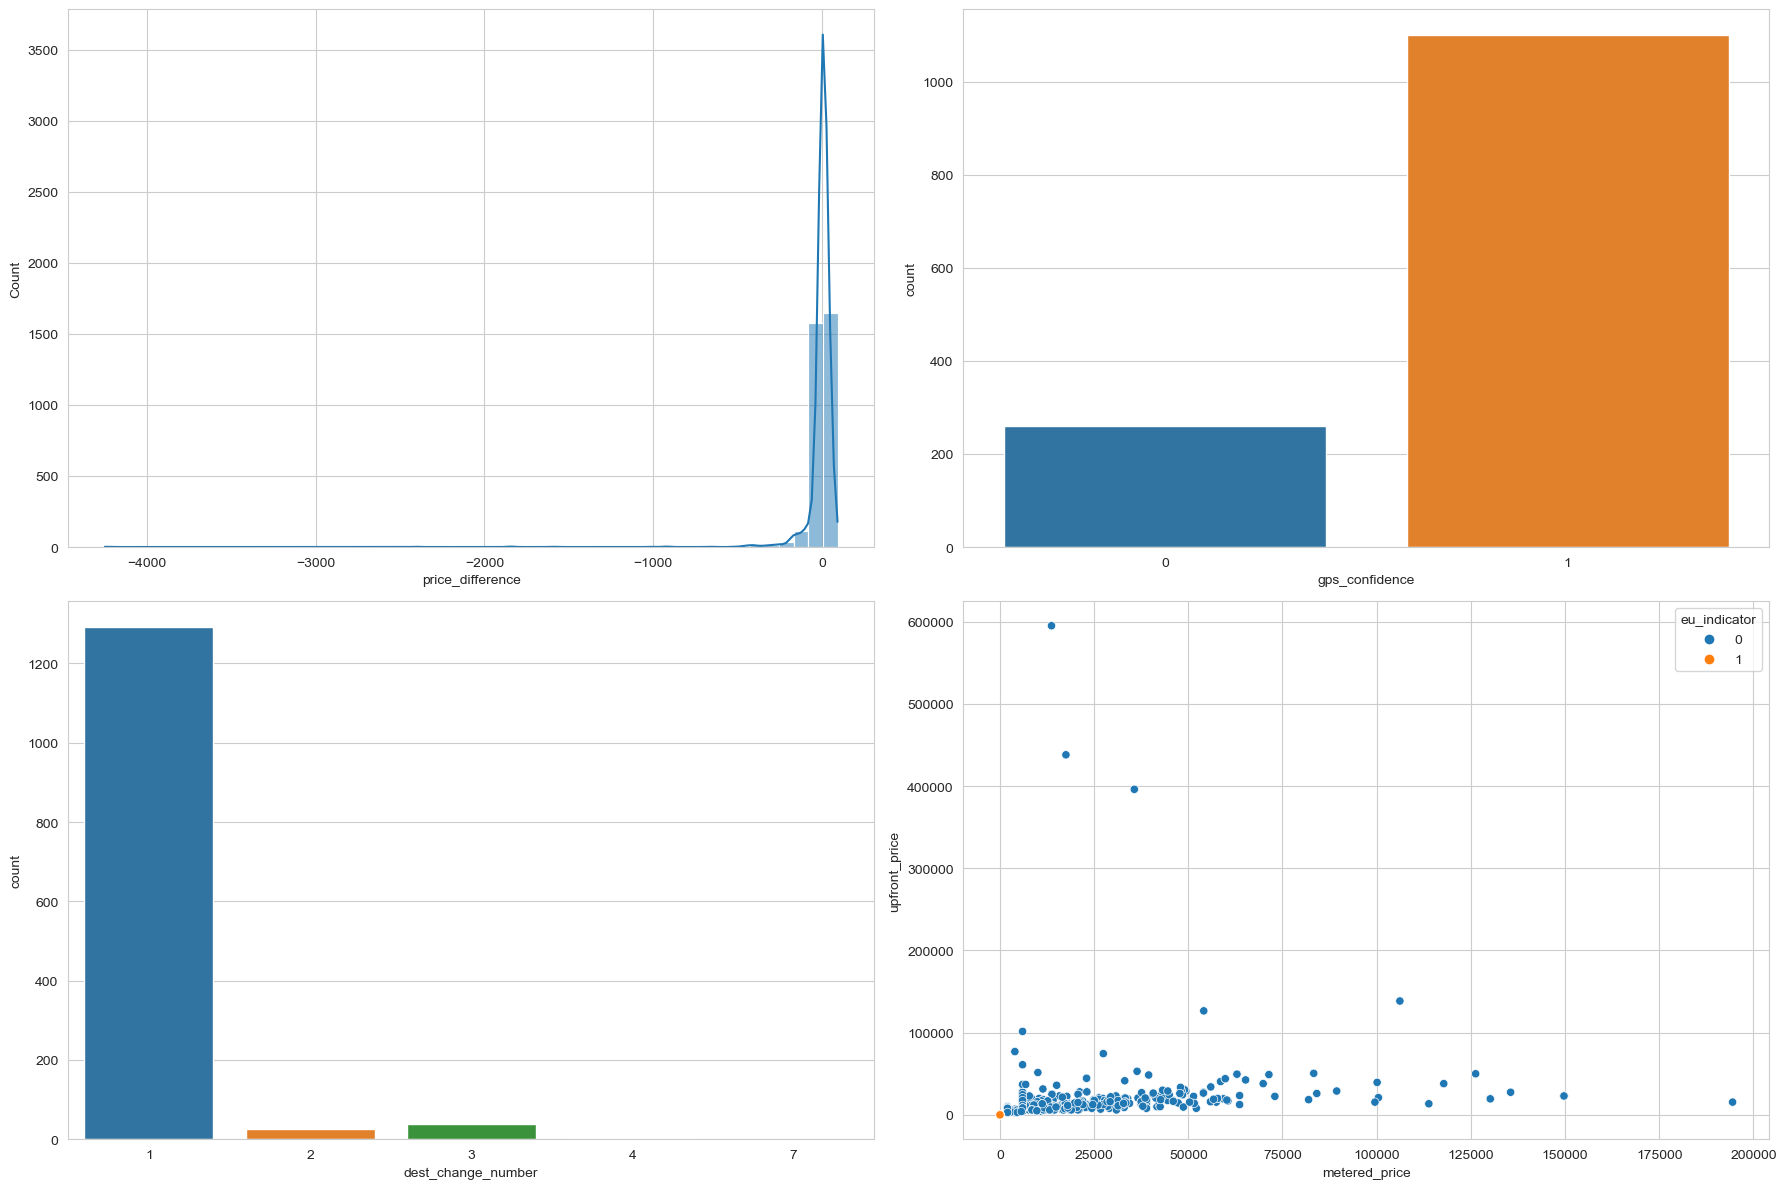

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
sns.histplot(data['price_difference'], bins=50, kde=True, ax=ax[0, 0])
sns.countplot(data=off_by_20, x='gps_confidence', ax=ax[0, 1])
sns.countplot(data=off_by_20, x='dest_change_number', ax=ax[1, 0])
sns.scatterplot(data=off_by_20, x='metered_price', y='upfront_price', hue='eu_indicator', ax=ax[1, 1])
plt.tight_layout()
plt.show()